

```
# Ce texte est au format code
```

# TP5 Supervised learning: Regression problem

In [23]:
%pip install scikit-optimize
%pip install pandas
%pip insall numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "insall" - maybe you meant "install"




[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
     -- ------------------------------------- 0.5/8.1 MB 15.2 MB/s eta 0:00:01
     -------- ------------------------------- 1.7/8.1 MB 15.9 MB/s eta 0:00:01
     -------------- ------------------------- 2.9/8.1 MB 18.7 MB/s eta 0:00:01
     ------------------- -------------------- 3.9/8.1 MB 19.4 MB/s eta 0:00:01
     ------------------------ --------------- 5.0/8.1 MB 19.9 MB/s eta 0:00:01
     ------------------------------- -------- 6.4/8.1 MB 20.4 MB/s eta 0:00:01
     ------------------------------------ --- 7.5/8.1 MB 20.8 MB/s eta 0:00:01
     ---------------------------------------  8.1/8.1 MB 19.9 MB/s eta 0:00:01
     ---------------------------------------- 8.1/8.1 MB 17.9 MB/s eta 0:00:00
     ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
     ---- ----------------------------------- 0.8/7.0 MB 24.1 MB/s eta 0:00:01
     --------- ------------------------------ 1.7/7.0 MB 21.8 MB/s 


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import warnings
warnings.filterwarnings('ignore')

### Part 1: Descriptive statistics and preprocessing

Let's first import all the libraries that will need.

In [4]:
import pandas as pd 
import numpy as np

1) Load _*train.csv*_ and _*test.csv*_ datasets, print their shapes, display the first few rows, and provide a summary with [pandas.DataFrame.describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) for each dataset.

In [5]:
# Answer
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

print("Train data shape:", train_data.shape)
print("Test data shape:" , test_data.shape)


Train data shape: (1000, 38)
Test data shape: (460, 38)


The train dataset contains __1000 samples and 38 features__, while the test dataset contains __460 samples and 38__ features. They both have the __same number of features__, which is expected since they are likely to be used for training and evaluating a machine learning model.

Let's display the first 10 records for both dataset

In [6]:
print("\nFirst 10 rows of Train data:")
train_data.head(10)



First 10 rows of Train data:


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   
5   6          50         85.0    14115            5            5       1993   
6   7          20         75.0    10084            8            5       2004   
7   8          60          NaN    10382            7            6       1973   
8   9          50         51.0     6120            7            5       1931   
9  10         190         50.0     7420            5            6       1939   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   
5          1995         0.0         732  ...          40           30   
6          2005       186.0        1369  ...         255           57   
7          1973       240.0         859  ...         235          204   
8          1950         0.0           0  ...          90            0   
9          1950         0.0         851  ...           0            4   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   
5              0        320            0         0      700      10    2009   
6              0          0            0         0        0       8    2007   
7            228          0            0         0      350      11    2009   
8            205          0            0         0        0       4    2008   
9              0          0            0         0        0       1    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  
5     143000  
6     307000  
7     200000  
8     129900  
9     118000  

[10 rows x 38 columns]

In [7]:
print("\nFirst 10 rows of Test data:")
test_data.head(10)


First 10 rows of Test data:


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0  1001          20         74.0    10206            3            3   
1  1002          30         60.0     5400            5            6   
2  1003          20         75.0    11957            8            5   
3  1004          90          NaN    11500            5            6   
4  1005         120         43.0     3182            7            5   
5  1006          80         65.0     8385            5            8   
6  1007          20          NaN    12155            6            3   
7  1008         160         21.0     2217            4            4   
8  1009          20         43.0    12118            7            5   
9  1010          50         60.0     6000            5            5   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0       1952          1952         0.0           0  ...           0   
1       1920          1950         0.0           0  ...           0   
2       2006          2006        53.0          24  ...         144   
3       1976          1976       164.0           0  ...           0   
4       2005          2006        16.0          16  ...         156   
5       1977          1977       220.0         595  ...         210   
6       1970          1970         0.0        1237  ...           0   
7       1970          1970         0.0         273  ...         238   
8       2004          2005       108.0           0  ...         100   
9       1926          1950         0.0           0  ...           0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0            0              0          0            0         0        0   
1           20             94          0            0         0        0   
2          104              0          0            0         0        0   
3            0              0          0            0         0        0   
4            0              0          0            0         0        0   
5            0              0          0            0         0        0   
6            0              0          0          147         0        0   
7            0              0          0            0         0        0   
8           48              0          0          180         0        0   
9            0            138          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       7    2009      82000  
1       1    2007      86000  
2       7    2008     232000  
3       6    2007     136905  
4       5    2009     181000  
5      11    2008     149900  
6       3    2007     163500  
7       8    2009      88000  
8       4    2009     240000  
9       6    2006     102000  

[10 rows x 38 columns]

2) Extract ```SalePrice``` as the target variable from the ```train``` and ```test``` datasets, storing them as ```train_target``` and ```test_target``` respectively. Remove unnecessary variables from the same datasets.

In [8]:
# Answer : Train target variable 'SalePrice'
train_target = train_data['SalePrice']
print("\nTrain target variable 'SalePrice':")
train_target


Train target variable 'SalePrice':


0      208500
1      181500
2      223500
3      140000
4      250000
        ...  
995    121600
996    136500
997    185000
998     91000
999    206000
Name: SalePrice, Length: 1000, dtype: int64

In [9]:
# Answer : Test target variable 'SalePrice'
test_target = test_data['SalePrice']
print("\nTest target variable 'SalePrice':")
test_target


Test target variable 'SalePrice':


0       82000
1       86000
2      232000
3      136905
4      181000
        ...  
455    175000
456    210000
457    266500
458    142125
459    147500
Name: SalePrice, Length: 460, dtype: int64

3) Define a function that identifies variables with missing values, and returns each variable's name, the number of missing values, and the percentage of missing values.

In [10]:
# Answer
import pandas as pd

def detect_missing_values(df : pd.DataFrame) -> pd.DataFrame:
    """
    Identify variables (columns) with missing values.
    Returns a DataFrame with:
      - variable name
      - number of missing values
      - percentage of missing values
    """
    missing = df.isnull().sum()
    missing = missing[missing > 0]  # keep only columns with missing values

    if missing.empty:
        print("No missing values found.")
        return pd.DataFrame(columns=['variable', 'missing_count', 'missing_percent'])

    missing_percent = 100 * missing / len(df)
    result = pd.DataFrame({
        'variable': missing.index,
        'missing_count': missing.values,
        'missing_percent': missing_percent.values
    }).sort_values(by='missing_percent', ascending=False).reset_index(drop=True)

    return result

print("Missing values in Train data:")
missing_train = detect_missing_values(train_data)
print(missing_train)		
print("\nMissing values in Test data:")
missing_test = detect_missing_values(test_data)
print(missing_test)

Missing values in Train data:
      variable  missing_count  missing_percent
0  LotFrontage            173             17.3
1  GarageYrBlt             56              5.6
2   MasVnrArea              6              0.6

Missing values in Test data:
      variable  missing_count  missing_percent
0  LotFrontage             86        18.695652
1  GarageYrBlt             25         5.434783
2   MasVnrArea              2         0.434783


4) For simplicity, fill the missing values with 0 using [pandas.DataFrame.fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html) (modify the same dataset).

In [ ]:
# Answer
def fill_missing_values_with_zero(df: pd.DataFrame) -> pd.DataFrame:
    """
    Handle missing values in numerical columns by filling with 0 (vectorized)
    """
    num_cols = df.select_dtypes(include=[np.number]).columns
    df[num_cols] = df[num_cols].fillna(0)  # vectorized
    
    return df

In [ ]:
# Test the function
train_data_filled = fill_missing_values_with_zero(train_data)
test_data_filled = fill_missing_values_with_zero(test_data)
print("Missing values after filling in Train data:")
print(detect_missing_values(train_data_filled))	
print("Missing values after filling in Test data:")
print(detect_missing_values(test_data_filled))

Missing values after filling in Train data:
No missing values found.
Empty DataFrame
Columns: [variable, missing_count, missing_percent]
Index: []
Missing values after filling in Test data:
No missing values found.
Empty DataFrame
Columns: [variable, missing_count, missing_percent]
Index: []


5) Describe the target variable ```train_target```

In [21]:
# Answer
train_target.describe()

count      1000.000000
mean     182284.451000
std       80291.215207
min       34900.000000
25%      130000.000000
50%      163995.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Results interpretation 
* This gives summary statistics of your target variable (SalePrice) in the training dataset.
* The description shows that there are __1000__ samples which match the number of records in the training set. 
* The __average SalePrice is 182284.45__.
* The __standard deviation is 80291.21__ It measures how spread out the prices are around the mean ,.
* The __minimum SalePrice is 34900.00__.
* The __maximum SalePrice is 755000.00__.
* The __first quartile is 130000.00__. 25% of the houses are below 130,000.
* The __second quartile (median) is 163995.00__.The middle value: half the houses are below this price, half above.
* The __third quartile is 215000.00__. 75% of the houses are below 215,000.


6) Plot the histogram and density of ```train_target``` (you can use [seaborn.displot](https://seaborn.pydata.org/generated/seaborn.displot.html) module)

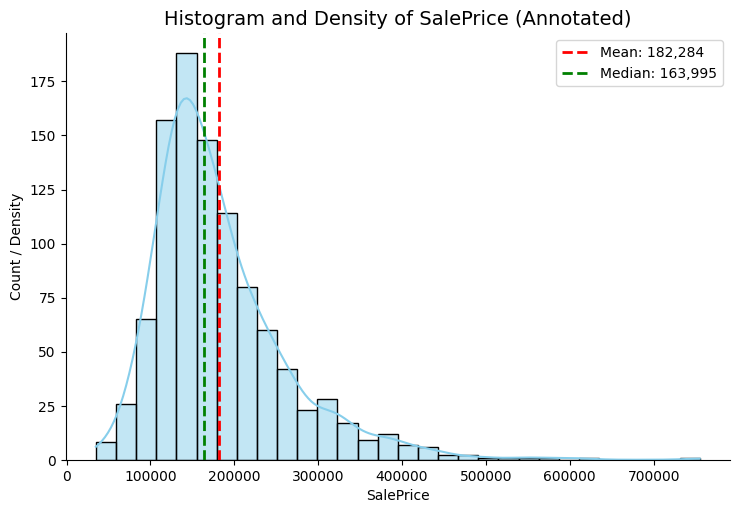

In [59]:
# Answer

# import seaborn as sns
# import matplotlib.pyplot as plt

# # Plot histogram + density
# sns.displot(train_target, kde=True, bins=30, height=5, aspect=1.5)

# # Add title and labels
# plt.title("Histogram and Density of SalePrice")
# plt.xlabel("SalePrice")
# plt.ylabel("Count / Density")
# plt.show()

# # train_target.hist(bins=30, edgecolor='black')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming train_target already exists
sns.displot(train_target, kde=True, bins=30, height=5, aspect=1.5, color="skyblue")
plt.title("Histogram and Density of SalePrice (Annotated)", fontsize=14)
plt.xlabel("SalePrice")
plt.ylabel("Count / Density")

# Mean, median, skew annotation
mean_val = train_target.mean()
median_val = train_target.median()

plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean_val:,.0f}")
plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f"Median: {median_val:,.0f}")

plt.legend()
plt.show()


7) Plot histograms of all other variables using [pandas.DataFrame.hist](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html)

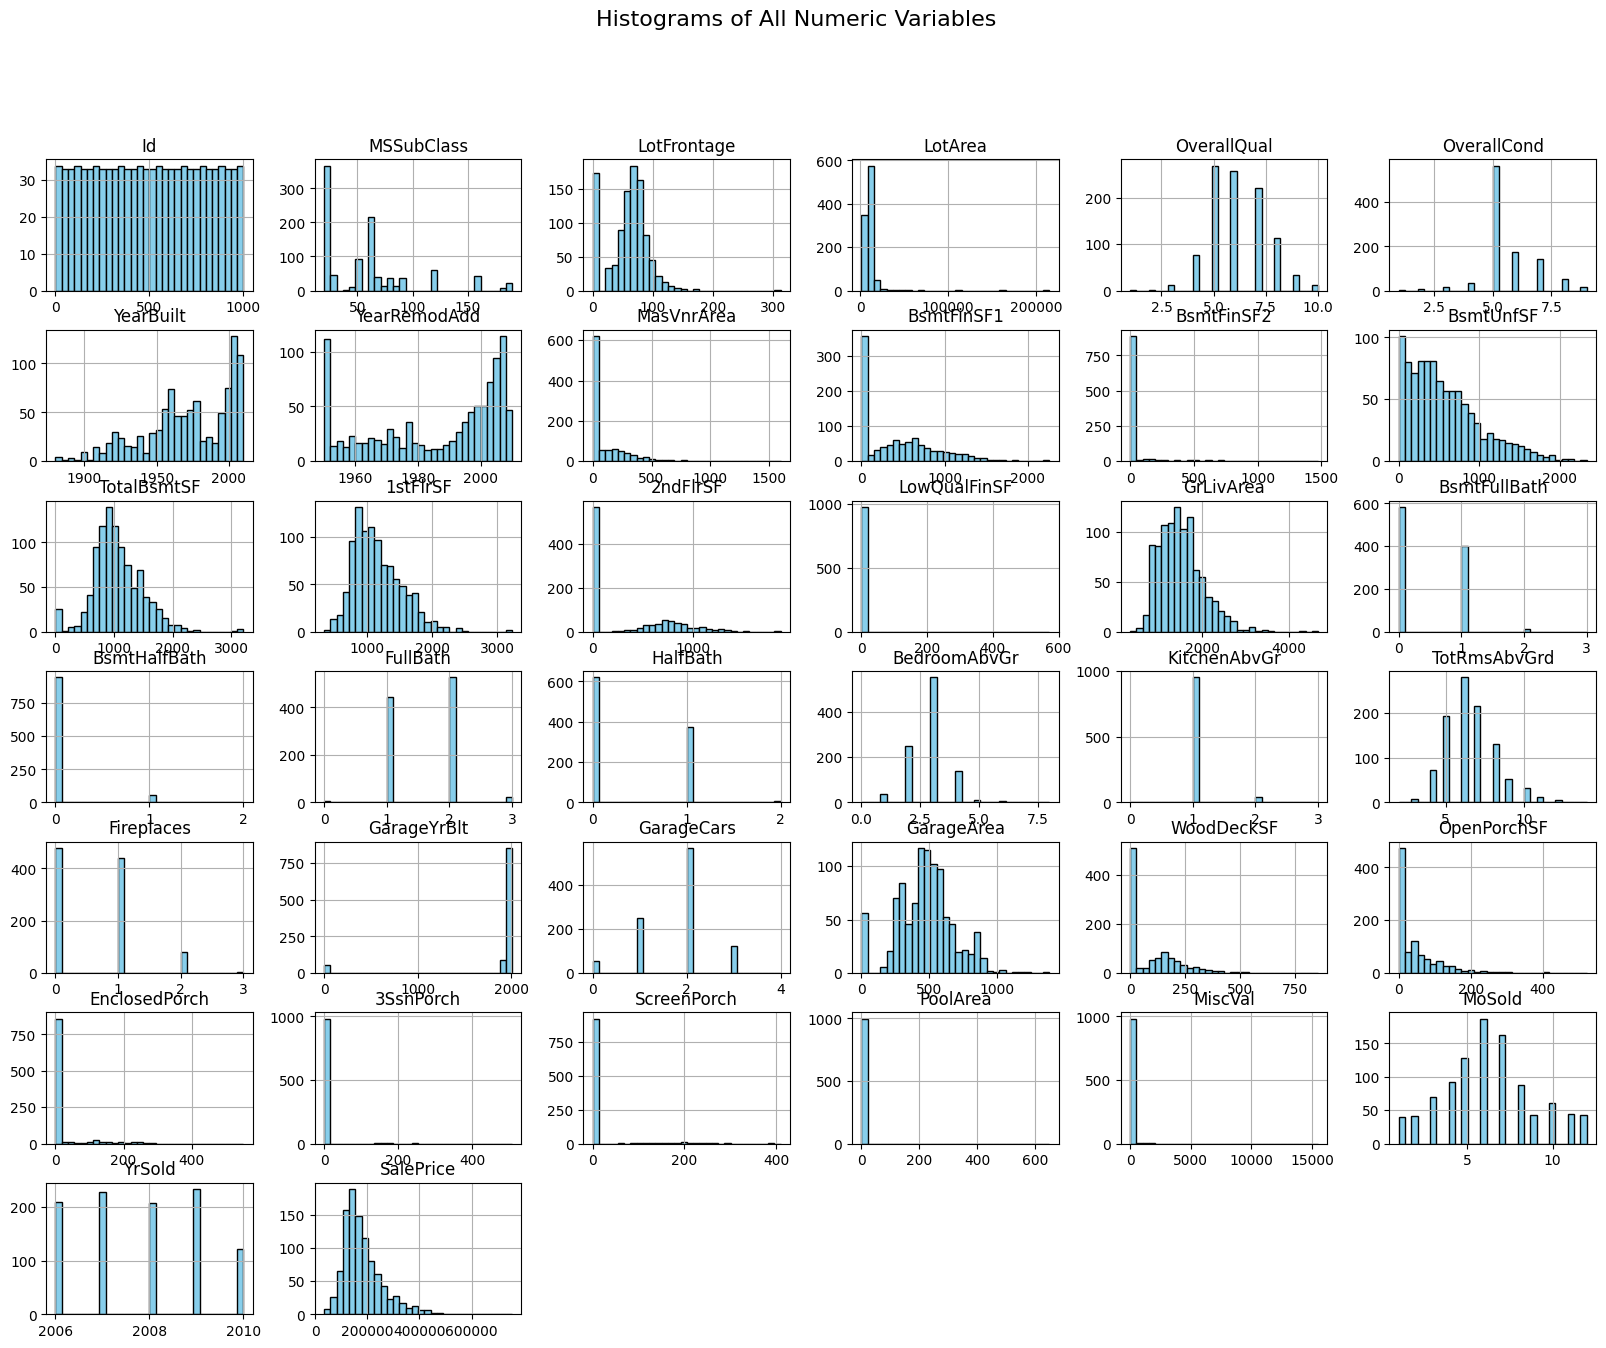

In [60]:
# Answer
import matplotlib.pyplot as plt

# Assuming your training dataset is called train_data
train_data.hist(
    bins=30, 
    figsize=(20, 15), 
    color='skyblue', 
    edgecolor='black'
)
plt.suptitle("Histograms of All Numeric Variables", fontsize=16)
plt.show()

8) Compute and plot the correlation matrix between the variables using [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html). Comment the results.

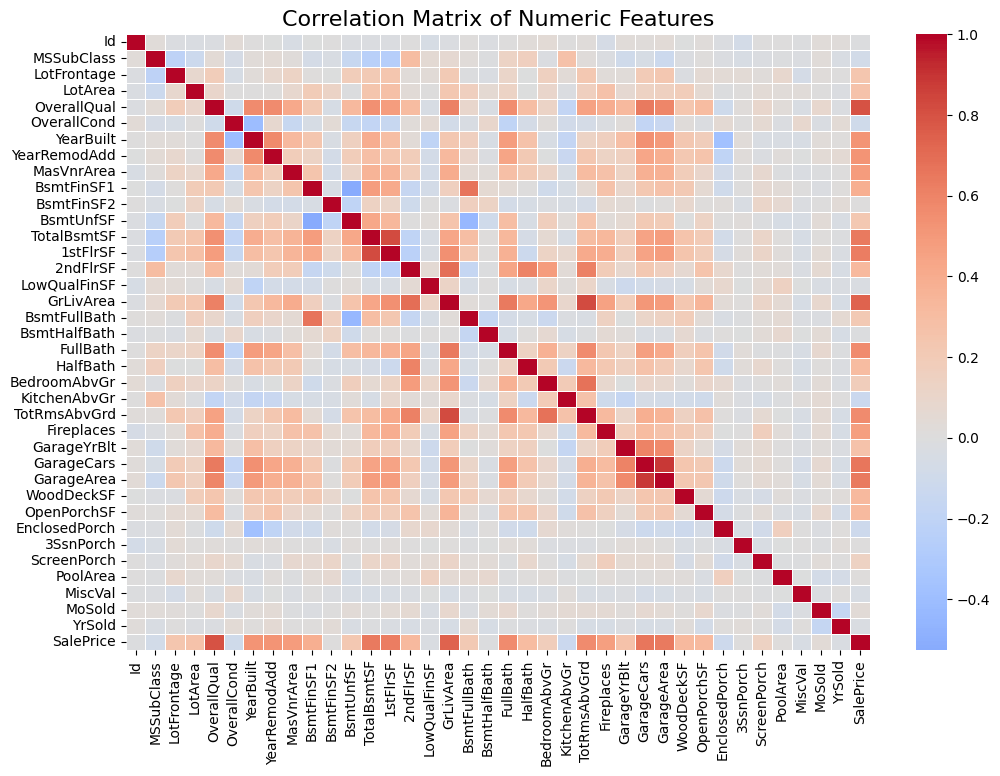

SalePrice        1.000000
OverallQual      0.797666
GrLivArea        0.734997
GarageCars       0.658204
GarageArea       0.647953
TotalBsmtSF      0.642127
1stFlrSF         0.627749
TotRmsAbvGrd     0.570375
FullBath         0.559980
YearBuilt        0.527193
YearRemodAdd     0.526195
MasVnrArea       0.491609
Fireplaces       0.473011
BsmtFinSF1       0.389868
2ndFlrSF         0.325329
WoodDeckSF       0.324953
OpenPorchSF      0.319551
HalfBath         0.304008
GarageYrBlt      0.266615
LotArea          0.265493
LotFrontage      0.237649
BsmtUnfSF        0.221219
BsmtFullBath     0.216566
BedroomAbvGr     0.173287
ScreenPorch      0.140744
MoSold           0.039314
PoolArea         0.012493
3SsnPorch        0.009682
BsmtFinSF2       0.000359
BsmtHalfBath    -0.009389
Id              -0.009525
LowQualFinSF    -0.028580
YrSold          -0.030562
MiscVal         -0.039521
MSSubClass      -0.081252
OverallCond     -0.095816
EnclosedPorch   -0.111712
KitchenAbvGr    -0.132654
Name: SalePr

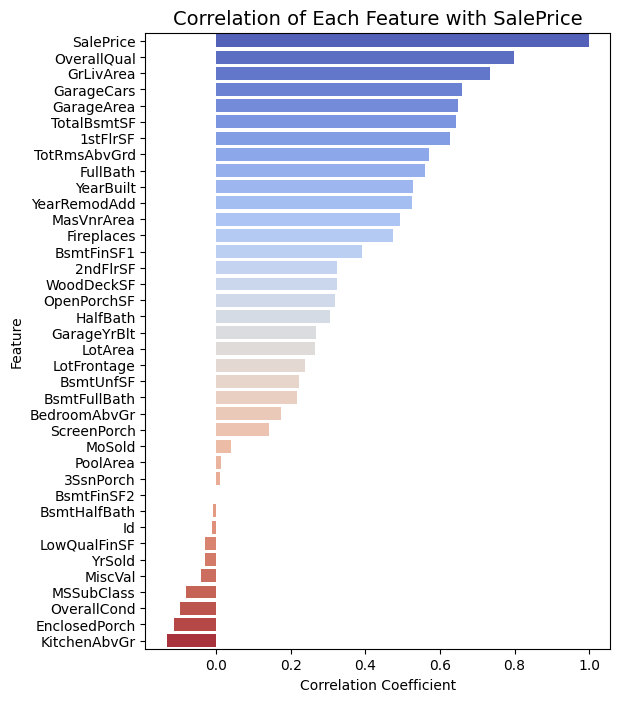

In [63]:
# Answer

import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for numeric variables
corr_matrix = train_data.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix, 
    annot=False,          # set True to show numeric values inside each cell
    cmap='coolwarm',      # blue = negative corr, red = positive corr
    center=0,
    linewidths=0.5
)
plt.title("Correlation Matrix of Numeric Features", fontsize=16)
plt.show()


# Correlation of each feature with SalePrice
corr_with_target = corr_matrix['SalePrice'].sort_values(ascending=False)
print(corr_with_target)


plt.figure(figsize=(6, 8))
sns.barplot(
    y=corr_with_target.index, 
    x=corr_with_target.values, 
    palette='coolwarm'
)
plt.title("Correlation of Each Feature with SalePrice", fontsize=14)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.show()



#### COMMENT 

1) Strongly Correlated Variables (r > 0.6)

* OverallQual (0.80) â€“ This is the variable most strongly correlated with price. The overall material and finish quality of the house has a major impact on its market value.

* GrLivArea (0.73) â€“ The above-ground living area has a strong positive relationship with price; larger homes are generally more expensive.

* GarageCars (0.66) and GarageArea (0.65) â€“ Both the number of garage spaces and the total garage area are good indicators of house price.

* TotalBsmtSF (0.64) and 1stFlrSF (0.63) â€“ Larger basement and first-floor areas contribute positively to the propertyâ€™s value.
  
  
ðŸ‘‰These features mainly reflect size and quality, the two most important factors determining real estate value.
  
2) Moderately Correlated Variables (0.3 â‰¤ r â‰¤ 0.6)

* TotRmsAbvGrd (0.57) and FullBath (0.56) â€“ More rooms and bathrooms are typically associated with higher sale prices.

* YearBuilt (0.53) and YearRemodAdd (0.53) â€“ Newer or recently renovated houses tend to sell for higher prices.

* MasVnrArea (0.49) and Fireplaces (0.47) â€“ Exterior finishes (like stone or brick) and the presence of fireplaces add value.

* BsmtFinSF1 (0.39) and 2ndFlrSF (0.33) â€“ Additional finished areas, such as a second floor or finished basement, increase the price.

ðŸ‘‰  These variables relate to modernity, comfort, and usable space.
  
3) Weakly Correlated Variables (0.1 â‰¤ r < 0.3)

* LotArea and LotFrontage (â‰ˆ 0.24â€“0.27) â€“ The total lot size plays a role, but less significant than the living area.

* WoodDeckSF, OpenPorchSF, and HalfBath (â‰ˆ 0.3) â€“ Outdoor amenities and additional features moderately influence price.

* BedroomAbvGr (0.17) â€“ The number of bedrooms alone is not a strong indicator, as itâ€™s often offset by total house size.

ðŸ‘‰ These variables represent secondary features that contribute less to price variation.

4)  Negatively Correlated Variables

* OverallCond (-0.10) â€“ Houses in poorer condition tend to sell for lower prices.

* KitchenAbvGr (-0.13) and EnclosedPorch (-0.11) â€“ These features are more common in older or less valuable homes.

* MSSubClass (-0.08) â€“ Lower building subclasses (often older styles) are associated with lower prices.

ðŸ‘‰ These variables indicate depreciation factors or outdated structural styles.

SUMMARY: 

* The most important predictors of sale price are:
* OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, and 1stFlrSF.

* Some variables are redundant with each other (e.g., GarageCars and GarageArea are highly correlated).

* Weakly or negatively correlated variables may be dropped or transformed depending on the modeling approach.

9) Visualize correlations between ```SalePrice``` and other variables using a [seaborn.barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html).

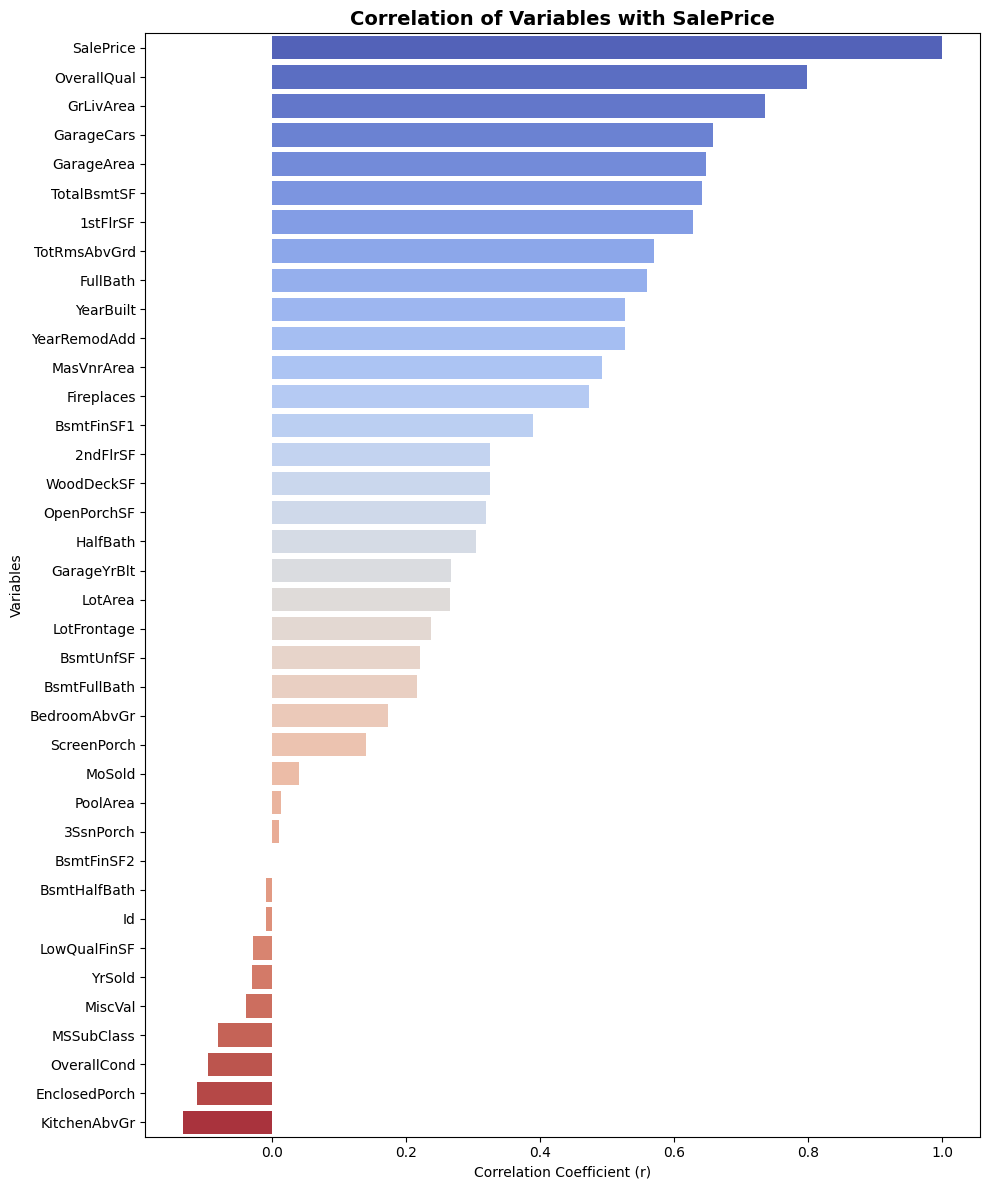

In [68]:
# Answer

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlations
corr = train_data.corr(numeric_only=True)["SalePrice"].sort_values(ascending=False)

# Convert to DataFrame for easier plotting
corr_df = corr.reset_index()
corr_df.columns = ["Variable", "Correlation"]

# Plot
plt.figure(figsize=(10, 12))
sns.barplot(
    data=corr_df,
    y="Variable",
    x="Correlation",
    palette="coolwarm",
    orient="h"
)
plt.title("Correlation of Variables with SalePrice", fontsize=14, fontweight='bold')
plt.xlabel("Correlation Coefficient (r)")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()



10) Visualize the scatter plot of the ```SalePrice``` variable as a function of the ```GrLivArea```. Comment.

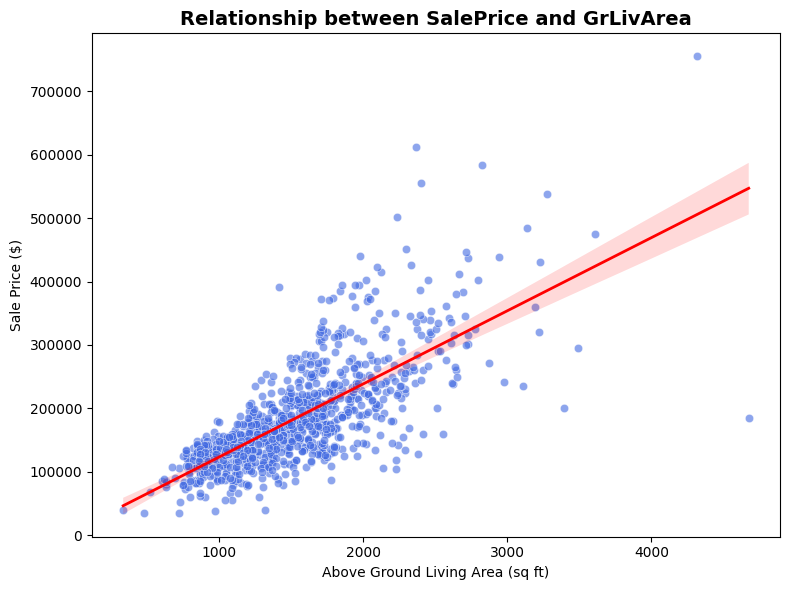

In [72]:
# Answer
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=train_data,
    x="GrLivArea",
    y="SalePrice",
    alpha=0.6,
    color="royalblue",
    edgecolor="w"
)

# Optional: add a regression line
sns.regplot(
    data=train_data,
    x="GrLivArea",
    y="SalePrice",
    scatter=False,
    color="red",
    line_kws={"linewidth": 2}
)

plt.title("Relationship between SalePrice and GrLivArea", fontsize=14, fontweight="bold")
plt.xlabel("Above Ground Living Area (sq ft)")
plt.ylabel("Sale Price ($)")
plt.tight_layout()
plt.show()



### Comment / Interpretation


* There is a strong positive linear relationship between GrLivArea (above-ground living area) and SalePrice.
â†’ As the living area increases, the house price tends to increase as well.

* The correlation coefficient (â‰ˆ 0.73) confirms this strong association.

* However, some outliers may appear:

* A few houses with large living areas but relatively low prices, possibly due to poor quality, location, or condition.

* These outliers could distort model performance if not handled (e.g., by removing or capping them).

* The linear trend suggests GrLivArea is an excellent predictor variable for regression models targeting SalePrice.

11) Visualize the boxplot of the ```SalePrice``` variable as a function of the ```OverallQual``` using [seaborn.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html). Interpret the boxplot

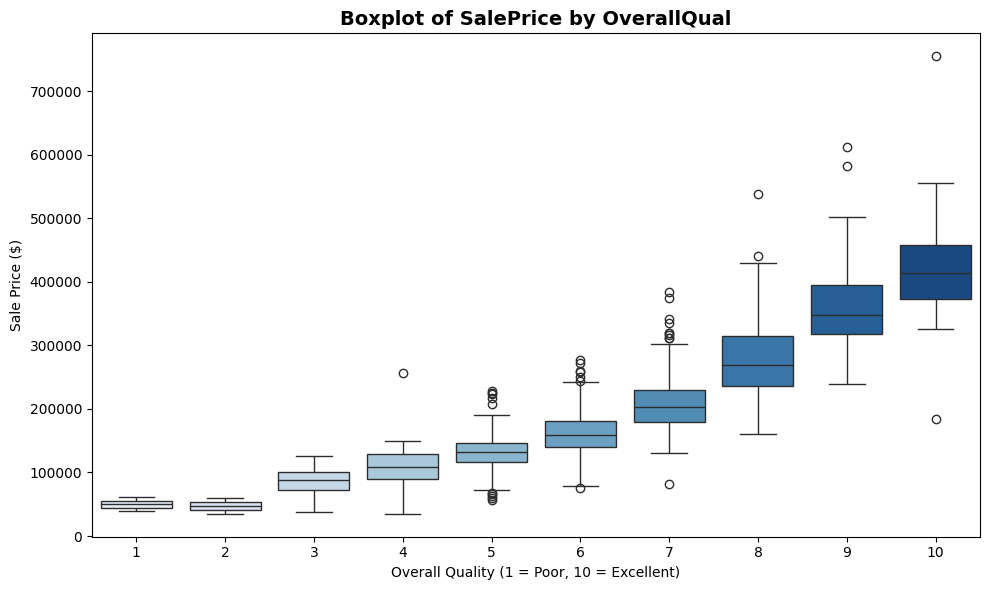

In [73]:
# Answer
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(
    data=train_data,
    x="OverallQual",
    y="SalePrice",
    palette="Blues",
    showfliers=True
)

plt.title("Boxplot of SalePrice by OverallQual", fontsize=14, fontweight="bold")
plt.xlabel("Overall Quality (1 = Poor, 10 = Excellent)")
plt.ylabel("Sale Price ($)")
plt.tight_layout()
plt.show()


### Interpretation

* The boxplot clearly shows a positive relationship between OverallQual (overall material and finish quality) and SalePrice.
â†’ Houses with higher quality ratings tend to have higher sale prices.

* Median SalePrice increases sharply with OverallQual:

* Homes rated 8â€“10 have significantly higher median prices.

* Homes rated 4â€“6 are in the mid-range.

* Homes rated 1â€“3 correspond to low-value properties.

* The interquartile range (IQR) also widens for higher quality levels, meaning:

* High-quality homes have greater price variability â€” likely due to differences in size, location, and luxury features.

* Outliers appear in almost all categories, especially at high quality levels.
â†’ These likely correspond to exceptionally expensive properties or luxury houses.

__Conclusion__

The OverallQual variable has a strong and clear effect on house prices.
It is one of the most influential predictors of SalePrice and should definitely be included in any predictive model.

12) Visualize the empirical distributions of the train and test dataset (for some variables). Comment the results.

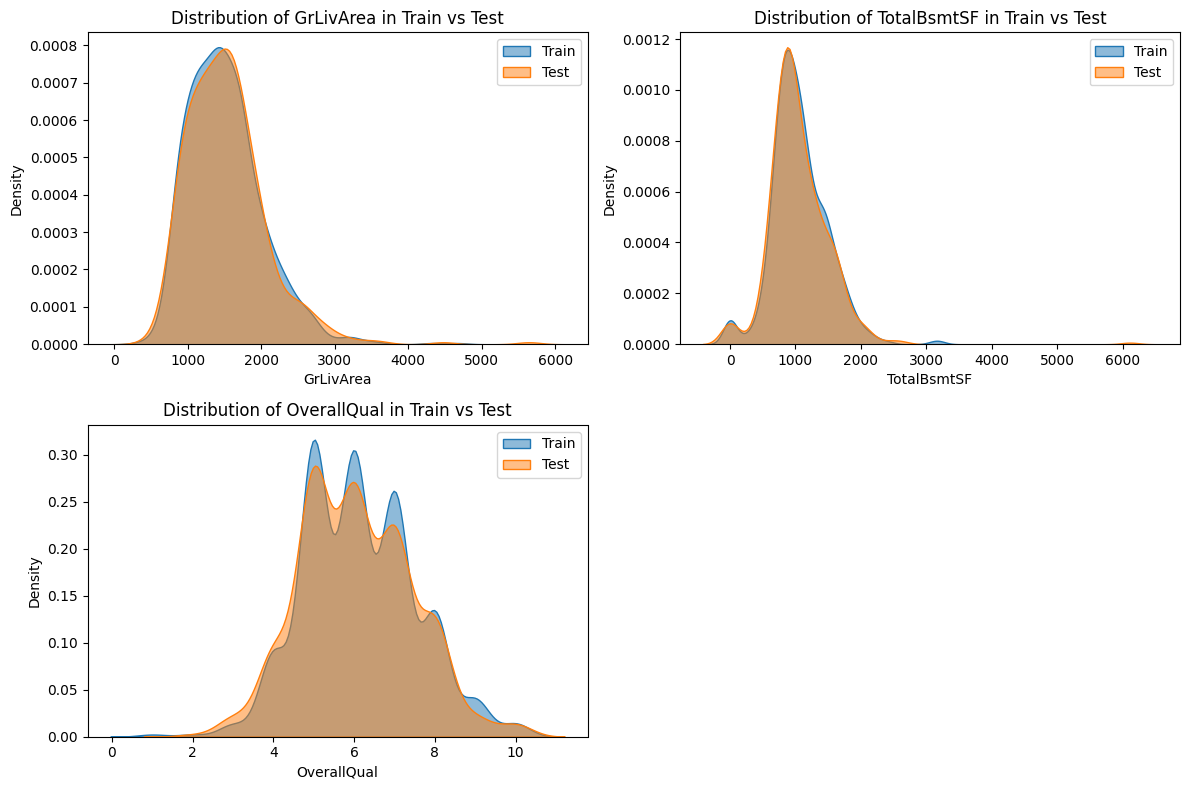

In [75]:
# Answer
import seaborn as sns
import matplotlib.pyplot as plt

# Choose a few key variables
variables = ['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'OverallQual']

plt.figure(figsize=(12,8))

for i, var in enumerate(variables[1:], 1):  # Exclude SalePrice (not in test set)
    plt.subplot(2, 2, i)
    sns.kdeplot(data=train_data, x=var, label='Train', fill=True, alpha=0.5)
    sns.kdeplot(data=test_data, x=var, label='Test', fill=True, alpha=0.5)
    plt.title(f'Distribution of {var} in Train vs Test')
    plt.legend()

plt.tight_layout()
plt.show()


### Interpretation

1) GrLivArea (Above-ground living area)

* The train (blue) and test (orange) distributions overlap almost perfectly.

* Both have a right-skewed shape â€” most houses have a living area between 1000â€“2000 ftÂ², with a few much larger homes.

* This suggests that the test data is drawn from the same population as the training data â€” excellent for generalization.

2) TotalBsmtSF (Total basement area)

* The two distributions are very similar, with peaks around 1000â€“1500 ftÂ².

* A few houses have 0 or very small basements, seen at the left edge â€” consistent across both datasets.

* Again, this indicates a balanced data split and consistent sampling.

3) OverallQual (Overall material and finish quality)

* Both train and test datasets follow almost the same multimodal pattern (peaks around quality levels 5â€“7).

* This shows that the distribution of quality ratings is well preserved between the two datasets.

* There might be a slight overrepresentation of higher-quality houses in the training data, but the difference is minimal.

### General Conclusion

* The empirical distributions between train and test datasets are highly consistent, meaning:

* The model trained on the training data can generalize well to the test set.

* Thereâ€™s no significant data drift or sampling bias.

* Small differences (like slightly higher peaks in the training distribution) are expected and acceptable.

### Part 2: Train and evaluate models

13) Split the data into training and validation data using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [50]:
# Answer


14) Fit a [linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) (we choose the linear regression to learn to predict the target variable) and measure its performance using the [RMSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) (RMSE = Root Mean Square Error) and [MAPE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html) (MAPE = Mean Absolute Percentage Error) as metric. Measure its performance on the test data. Comment the results.

**Recall:**

$$RMSE(Y,\hat{Y}) = \sqrt{\frac{1}{n} \sum_{i=1}^n (Y_i - \hat{Y_i})^2}\,\,\,\,\,\,\,\,MAPE(Y,\hat{Y}) = \frac{1}{n} \sum_{i=1}^n \frac{|Y_i - \hat{Y_i}|}{Y_i}$$

where $Y$ is the true target and  $\hat{Y}$ is the predicted target  

In [51]:
# Answer


**Objective: Improve the predictions!**

15) Train the following models and evaluate their performance on validation and test set.
* [K-Nearest Neighbors Regressor (KNeighborsRegressor)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)
* [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
* [Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [52]:
# Answer


16) Define a function that takes in parameter a dictionnary of models and returns the mean and standard deviation of the MAPE on [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) with three sets. You can consider the following models:

* [Support Vector Regressor (SVR)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)
* [Extreme Gradient Boosting Regressor (XGBRegressor)](https://xgboost.readthedocs.io/en/stable/parameter.html)
* [Decision tree regressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
* [K-Nearest Neighbors Regressor (KNeighborsRegressor)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)
* [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
* [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
* [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
* [Gradient Boosting Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)
* [Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [53]:
# Answer


### Part 4: Fine tunning

17) Choose three best methods and evaluate their performance on the test data by varying some of their parameters.

In [54]:
# Answer


18) Perform an automated parameter search using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) on a model of your choice and assess the performance of the best-tuned model on the test dataset.

In [55]:
# Answer


19) Perform an automated parameter search using Bayesian optimization with [gp_minimize](https://scikit-optimize.github.io/stable/modules/generated/skopt.gp_minimize.html) and assess the performance of the best-tuned model on the test dataset.

In [56]:
# Answer


### Part 5: Ensemble modeling

20) **Aggregation:** Fit and predict the target using 4 best models. Then, aggregate the results using the mean and median. Evaluate the performances.

In [57]:
# Answer


21) **Stacking:** Perform the following steps:<br>

   1. Fit the 4 best models on the ```tr_x``` and save the predictions on ```val_x``` on a new dataframe named ```design_layer1``` and the predictions on ```data_test``` on ```test_layer1```. <br>
   2. Fit a new model on the ```design_layer1```. <br>
   3. Predict the target using the new model.  

In [58]:
# Answer
